In [2]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

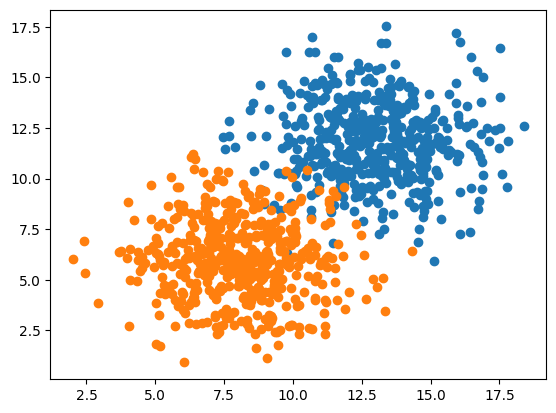

In [3]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [4]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
adam = Adam(learning_rate = 0.1)
model.compile(adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
h = model.fit(x = X, y = y, verbose = 1, batch_size = 50, epochs = 500, shuffle = 'true')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4880 - loss: 2.4000
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6081 - loss: 0.7017  
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8890 - loss: 0.4664 
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.3877 
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9228 - loss: 0.3282 
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9228 - loss: 0.3049 
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9582 - loss: 0.2599 
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9649 - loss: 0.2299 
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9566 - loss: 0.2150 
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9558 - loss: 0.2073 
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9673 - loss: 0.1831 
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

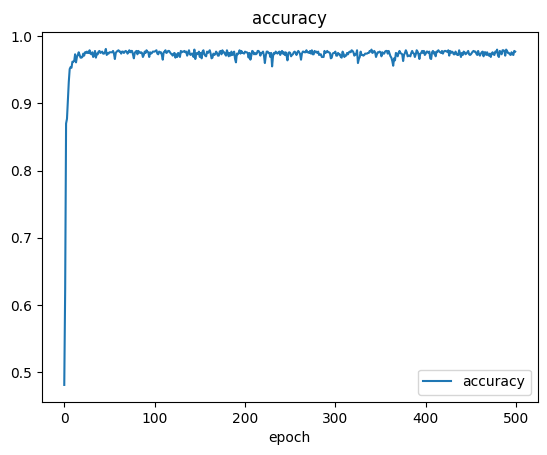

In [5]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.legend(['accuracy'])

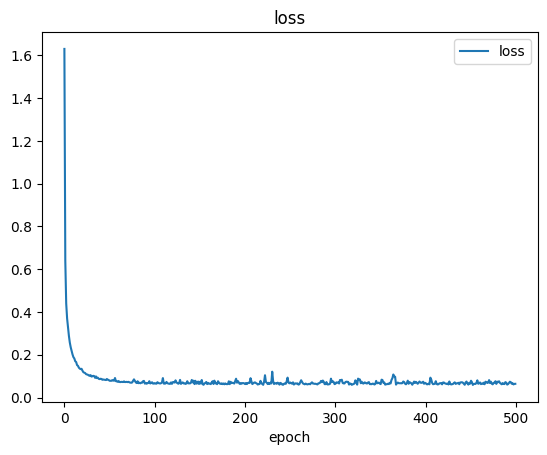

In [6]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])
plt.legend(['loss'])

In [8]:
def plot_decision_boundary(X, y, model):
  x_span = np.linspace(min(X[:,0] - 1), max(X[:,0]) + 1, 50)
  y_span = np.linspace(min(X[:,1] - 1), max(X[:,1]) + 1, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


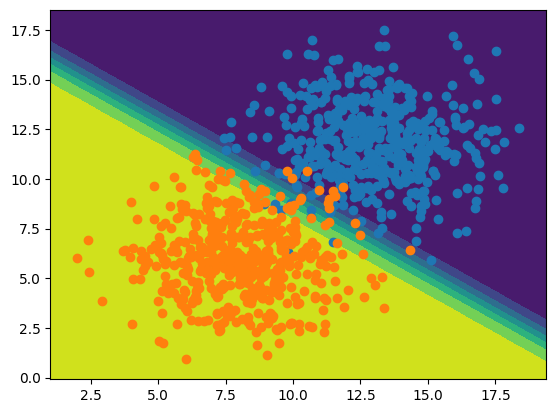

In [10]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Prediction is:  [[0.9999889]]


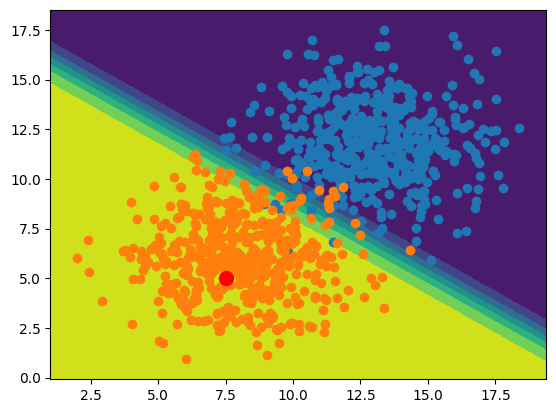

In [11]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker = 'o', markersize = 10, color = 'red')
print('Prediction is: ', prediction)